In [1]:
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pandas import DataFrame
from tkinter import filedialog
from math import log

import tkinter as tk
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

import random
import warnings
import sys

warnings.filterwarnings('ignore')

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [8]:
def DataLogisticRegression():
    
    #CSV_Name           = str(CSV_Name_.get())
    #print(str(CSV_path_.get()))
    #CSV_path            = str(CSV_path_.get())
    lr                 = float(lr_.get())
    stop_loss          = int(CrossEntropy_.get())
    stop_iteration     = int(Iteration_.get())
    stop_trainIdenRate = float(IdenRate_Train_.get())
    stop_testIdenRate  = float(IdenRate_Test_.get())
    
    #data_CSV = CSV_Name + '.CSV'
    data_df = pd.DataFrame(pd.read_csv(CSV_path))
    
    # shuffle and split the data
    data_df = data_df.sample(frac=1).reset_index(drop=True)
    dataLength = len(data_df)
    trainData_df = data_df.loc['0':str(2*dataLength/3-1),'0':'2']             # train data
    testData_df  = data_df.loc[str(2*dataLength/3-1):dataLength,'0':'2']      # test data
    testData_df.reset_index(inplace=True)                                     # reset index 0~dataLength
    
    # make dataframe to dict
    train_dict = trainData_df.to_dict(orient='dict')
    test_dict  = testData_df.to_dict(orient='dict')
    
    # 參數設定
    loss_train = 0
    loss_flag = True
    loss_history = []
    loss_test_history = []
    iteration = 0
    bias = random.uniform(0, 1)
    weight1 = random.uniform(0, 1)
    weight2 = random.uniform(0, 1)
    
    # 進行訓練
    while (loss_flag):
    
        train_predict = 0
        loss_train = 0
        loss_test = 0
        weight1_changeValue = 0
        weight2_changeValue = 0
        bias_changeValue = 0
        iteration = iteration + 1
    
        for i in range (len(trainData_df)):
            train_tempLabel = int(train_dict['2'][i]) - 1
        
            train_predict = sigmoid(bias + weight1*train_dict['0'][i] + weight2*train_dict['1'][i])
            loss_train = -( train_tempLabel*log(train_predict) + (1-train_tempLabel)*log(1-train_predict)) + loss_train
            weight1_changeValue = weight1_changeValue + (train_predict - train_tempLabel) * train_dict['0'][i]
            weight2_changeValue = weight2_changeValue + (train_predict - train_tempLabel) * train_dict['1'][i]
            bias_changeValue    = bias_changeValue    + (train_predict - train_tempLabel)
        
        for i in range (len(testData_df)):
            test_tempLabel = int(test_dict['2'][i]) - 1
        
            test_predict = sigmoid(bias + weight1*test_dict['0'][i] + weight2*test_dict['1'][i])
            loss_test = -( test_tempLabel *log(test_predict) + (1-test_tempLabel )*log(1-test_predict)) + loss_test
    
        weight1 = weight1 - lr/len(trainData_df) * weight1_changeValue  # renew the parameters
        weight2 = weight2 - lr/len(trainData_df) * weight2_changeValue
        bias    = bias - lr/len(trainData_df) * bias_changeValue
    
        loss_history.append(loss_train)
        loss_test_history.append(abs(loss_test))
        
        # 計算訓練集的辨識率
        correctNum_train = 0
        for i in range (len(trainData_df)):
            train_tempLabel = int(train_dict['2'][i]) - 1
            train_predict = sigmoid(bias + weight1*train_dict['0'][i] + weight2*train_dict['1'][i])
            if abs(train_tempLabel-train_predict) < 0.5:
                correctNum_train += 1
        trainIdenRate = correctNum_train/len(trainData_df)
        
        # 計算測試集的辨識率
        correctNum_test = 0
        for i in range (len(testData_df)):
            test_tempLabel = int(test_dict['2'][i]) - 1
            test_predict = sigmoid(bias + weight1*test_dict['0'][i] + weight2*test_dict['1'][i])
            if abs(test_tempLabel-test_predict) < 0.5:
                correctNum_test += 1
        testIdenRate = correctNum_test/len(testData_df)
                
        if(loss_train < stop_loss or iteration >= stop_iteration or trainIdenRate >= stop_trainIdenRate or testIdenRate >= stop_testIdenRate):
            loss_flag = False
            
    
    plt.title('Train cross entropy')
    plt.xlabel('Iteration')
    plt.ylabel('cross Entropy')
    plt.plot(range(1,len(loss_history)+1), loss_history, lw = 2, c='darkorange')
    plt.show()
    
    # TK TEXT
    show_text.insert('insert',"data length : ")
    show_text.insert('insert', len(data_df)) 
    show_text.insert('insert',"\ntrain data length : ")
    show_text.insert('insert', len(trainData_df))
    show_text.insert('insert',"\ntest data length  : ")
    show_text.insert('insert', len(testData_df))
    
    show_text.insert('insert',"\n\nIteration : ")
    show_text.insert('insert', iteration) 
    
    show_text.insert('insert',"\n\nTrain Cross Entropy : ")
    show_text.insert('insert', round(loss_train, 5))
    show_text.insert('insert',"\nTrain Cross Entropy : ")
    show_text.insert('insert', round(loss_test, 5))
    
    show_text.insert('insert',"\n\nTrain Identification rate    : ")
    show_text.insert('insert', round(correctNum_train/len(trainData_df), 5)) 
    show_text.insert('insert',"\nTest Identification rate     : ")
    show_text.insert('insert', round(correctNum_test/len(testData_df), 5))
    show_text.insert('insert',"\nAll data Identification rate : ")
    show_text.insert('insert', round((correctNum_train + correctNum_test)/len(data_df), 5))
    
    # TK FIGURE
    root = tk.Tk()
    root.title('After Logistic Regression')
    
    #-----------------------------------------------------
    figure1 = plt.Figure(figsize=(6,5), dpi=100)
    ax1 = figure1.add_subplot(111)
    
    # 畫出資料點 
    for i in range(0, len(data_df)):
        if data_df['2'][i] == 1.0:
            ax1.scatter(data_df['0'][i], data_df['1'][i], c = 'r', marker = '.')
        elif data_df['2'][i] == 2.0:
            ax1.scatter(data_df['0'][i], data_df['1'][i], c = 'b', marker = '.')
            
    labelOne = mpatches.Patch(color='red', label='1')
    labelTwo = mpatches.Patch(color='blue', label='2')
    ax1.legend(handles = [labelOne, labelTwo])
    scatter1 = FigureCanvasTkAgg(figure1, root) 
    scatter1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
    ax1.set_xlabel('x data')
    ax1.set_xlabel('y data')
    ax1.set_title('All Data')
    
    #-----------------------------------------------------
    figure2 = plt.Figure(figsize=(5,4), dpi=100)
    ax = figure2.add_subplot(111)
    # 畫出分布樣貌
    xPoint = np.linspace(int(min(trainData_df['0'])-2), int(max(trainData_df['0'])+2), 30)
    yPoint = np.linspace(int(min(trainData_df['1'])-2), int(max(trainData_df['1'])+2), 30)
    for i in range(30):
        for j in range(30): 
            temp = sigmoid(bias + weight1 * xPoint[i] + weight2 * yPoint[j])
            if temp >= 0.5:
                ax.scatter(xPoint[i], yPoint[j], c = 'lightblue', marker = 'x')
            elif temp < 0.5:
                ax.scatter(xPoint[i], yPoint[j], c = 'lightpink', marker = 'x')
                
    # 畫出分野界線
    xPoint = np.linspace(int(min(trainData_df['0'])-2), int(max(trainData_df['0'])+2), 150)
    yPoint = np.linspace(int(min(trainData_df['1'])-2), int(max(trainData_df['1'])+2), 150)
    for i in range(150):
        for j in range(150):
            temp = sigmoid(bias + weight1 * xPoint[i] + weight2 * yPoint[j])
            if temp > 0.49 and temp < 0.51:
                ax.scatter(xPoint[i], yPoint[j], c = 'black', marker = '.')
                
    # 畫出資料點 
    for i in range(0, len(data_df)):
        if data_df['2'][i] == 1.0:
            ax.scatter(data_df['0'][i], data_df['1'][i], c = 'r', marker = '.')
        elif data_df['2'][i] == 2.0:
            ax.scatter(data_df['0'][i], data_df['1'][i], c = 'b', marker = '.')
            
    labelOne = mpatches.Patch(color='red', label='1')
    labelTwo = mpatches.Patch(color='blue', label='2')
    ax.legend(handles = [labelOne, labelTwo])
    scatter = FigureCanvasTkAgg(figure2, root) 
    scatter.get_tk_widget().pack(side = tk.LEFT, fill = tk.BOTH)
    
    ax.set_xlabel('x data')
    ax.set_xlabel('y data')
    ax.set_title('Logistic Regression')
    
    root.mainloop()

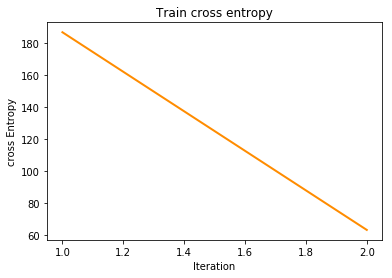

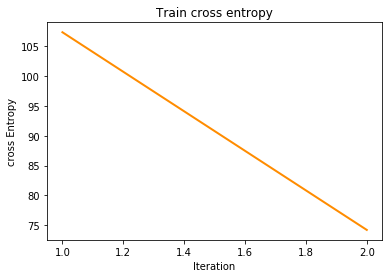

In [10]:
window = tk.Tk()
window.title('Logistic Regression Classifier')
window.geometry('600x330')

#CSV_path = filedialog.askopenfilename()

# 以下為 CSV_Name Label
#CSV_path_frame = tk.Frame(window)
#CSV_Name_frame.pack(side=tk.TOP)
#CSV_Name_label = tk.Label(CSV_Name_frame, text = '檔案名稱')
#CSV_Name_label.pack(side = tk.LEFT)
# CSV_Name Entry
#CSV_path_ = tk.Entry(CSV_path_frame)
#CSV_Name_.pack()

#------------------------------------------------------------------------#

def Pathfinding():
    global CSV_path 
    CSV_path = filedialog.askopenfilename()
    show_text.insert('insert', "File Path：" + CSV_path)
    show_text.insert('insert', "\n\n")
    return CSV_path

button_selectCSV = tk.Button(window, text = "選擇檔案", command = Pathfinding)
button_selectCSV.pack()
#------------------------------------------------------------------------#

# 以下為 lr Label
lr_frame = tk.Frame(window)
lr_frame.pack(side=tk.TOP)
lr_label = tk.Label(lr_frame, text = '學習率')
lr_label.pack(side = tk.LEFT)
# lr Entry
lr_ = tk.Entry(lr_frame)
lr_.pack()


# 以下為 Iteration Label
Iteration_frame = tk.Frame(window)
Iteration_frame.pack(side=tk.TOP)
Iteration_label = tk.Label(Iteration_frame, text = '終止條件：遞迴次數')
Iteration_label.pack(side = tk.LEFT)
# Iteration Entry
Iteration_ = tk.Entry(Iteration_frame)
Iteration_.pack()


# 以下為 CrossEntropy Label
CrossEntropy_frame = tk.Frame(window)
CrossEntropy_frame.pack(side=tk.TOP)
CrossEntropy_label = tk.Label(CrossEntropy_frame, text = '終止條件：交叉熵大小')
CrossEntropy_label.pack(side = tk.LEFT)
# CrossEntropy Entry
CrossEntropy_ = tk.Entry(CrossEntropy_frame)
CrossEntropy_.pack()


# 以下為 IdenRate Train Label
IdenRate_Train_frame = tk.Frame(window)
IdenRate_Train_frame.pack(side=tk.TOP)
IdenRate_Train_label = tk.Label(IdenRate_Train_frame, text = '終止條件：訓練集辨識率大小')
IdenRate_Train_label.pack(side = tk.LEFT)
# IdenRate Train Entry
IdenRate_Train_ = tk.Entry(IdenRate_Train_frame)
IdenRate_Train_.pack()


# 以下為 IdenRate Test Label
IdenRate_Test_frame = tk.Frame(window)
IdenRate_Test_frame.pack(side=tk.TOP)
IdenRate_Test_label = tk.Label(IdenRate_Test_frame, text = '終止條件：訓練集辨識率大小')
IdenRate_Test_label.pack(side = tk.LEFT)
# IdenRate Test Entry
IdenRate_Test_ = tk.Entry(IdenRate_Test_frame)
IdenRate_Test_.pack()


#------------------------------------------------------------------------#
# 以下為 Show Text
show_text = tk.Text(window, height = 10, width = 52)
show_text.pack()
#------------------------------------------------------------------------#
# Part of Function and Button
def deleteData():   
    show_text.delete("1.0",tk.END)

button_train = tk.Button(window, text = "Train", command = DataLogisticRegression)
button_train.pack()

button_clear = tk.Button(window, text = "Clear", command = deleteData)
button_clear.pack()

window.mainloop()